In [5]:
%load_ext autoreload
%autoreload 2

# Manipulation and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

# Metrics
from sklearn.metrics import mean_squared_error, confusion_matrix, auc, roc_auc_score, roc_curve

# Helper functions
import sys
import os
sys.path.append('../')
from src.models import light_gbm

plt.style.use('ggplot')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 15)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
df = pd.read_csv('../data/processed/cleaned_data.csv')
df2 = pd.read_csv('../data/processed/collisions_and_intersections_cleaned.csv')
df.head()

,Datetime,X,Y,OBJECTID,INCKEY,ADDRTYPE,INTKEY,LOCATION,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,ST_COLCODE,CROSSWALKKEY,SPEEDING_Y,INATTENTIONIND_Y,HITPARKEDCAR_Y,PEDROWNOTGRNT_Y,WEATHER_Adverse,WEATHER_Good,WEATHER_Unknown,ROADCOND_Adverse,ROADCOND_Dry,ROADCOND_Unknown,LIGHTCOND_Dark,LIGHTCOND_Daylight,LIGHTCOND_Unknown,LIGHTCOND_VeryDark,SEVERITYCODE_Injury,SEVERITYCODE_PropertyDamage,SEVERITYCODE_Unknown
0,2004-01-01 00:00:00,NaN,NaN,11627,25040,Block,NaN,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,2,0,0,2,1,0,0,2004/01/01 00:00:00+00,Mid-Block (not related to intersection),14.0,0,13,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
1,2004-01-01 00:00:00,-122.318760,47.604359,12525,24635,Block,NaN,E ALDER ST BETWEEN 10TH AVE AND 11TH AVE,2,0,0,2,0,0,0,2004/01/01 00:00:00+00,Mid-Block (not related to intersection),16.0,0,32,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,2004-01-01 00:00:00,-122.320780,47.614076,14172,26463,Intersection,29745.0,BROADWAY AND E PIKE ST,4,0,0,2,1,0,0,2004/01/01 00:00:00+00,At Intersection (intersection related),11.0,0,28,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
3,2004-01-01 00:00:00,-122.383351,47.529183,6538,19530,Block,NaN,SW ROSE ST BETWEEN 39TH AVE SW AND 41ST AVE SW,2,0,0,2,0,0,0,2004/01/01 00:00:00+00,Mid-Block (not related to intersection),14.0,0,32,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
4,2004-01-01 00:00:00,-122.329974,47.708637,9665,22520,Block,NaN,N NORTHGATE WAY BETWEEN CORLISS AVE N AND 1ST ...,1,0,0,1,0,0,0,2004/01/01 00:00:00+00,Mid-Block (not related to intersection),28.0,0,50,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [12]:
# Drop columns and check NaN
to_drop = ['Datetime', 'X', 'Y', 'OBJECTID', 'INCKEY', 'ADDRTYPE', 'LOCATION', 
           'INCDATE', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'ST_COLCODE', 'INTKEY',
           'PERSONCOUNT']
data = df.drop(columns=to_drop)
data.isnull().sum()

PEDCOUNT                       0
PEDCYLCOUNT                    0
VEHCOUNT                       0
INJURIES                       0
SERIOUSINJURIES                0
                              ..
LIGHTCOND_Unknown              0
LIGHTCOND_VeryDark             0
SEVERITYCODE_Injury            0
SEVERITYCODE_PropertyDamage    0
SEVERITYCODE_Unknown           0
Length: 25, dtype: int64

## Start the base model
1. Define target based on our business case
a. Binary injury/not injury, collisions with pedestrains/cyclists vs not, etc
2. Create train/test split
3. Train model
4. Evaluate metrics

#### All data

In [91]:
# Define our target. In this case can use severitycode_injury
data['SEVERITYCODE_Injury'].value_counts()/data.shape[0]
importances = pd.DataFrame()

[1]	valid_0's binary_logloss: 0.61993
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.619502
[3]	valid_0's binary_logloss: 0.618558
[4]	valid_0's binary_logloss: 0.617745
[5]	valid_0's binary_logloss: 0.616795
[6]	valid_0's binary_logloss: 0.615859
[7]	valid_0's binary_logloss: 0.615085
[8]	valid_0's binary_logloss: 0.614236
[9]	valid_0's binary_logloss: 0.613337
[10]	valid_0's binary_logloss: 0.61247
[11]	valid_0's binary_logloss: 0.611641
[12]	valid_0's binary_logloss: 0.610805
[13]	valid_0's binary_logloss: 0.609977
[14]	valid_0's binary_logloss: 0.609172
[15]	valid_0's binary_logloss: 0.608442
[16]	valid_0's binary_logloss: 0.607661
[17]	valid_0's binary_logloss: 0.606897
[18]	valid_0's binary_logloss: 0.606157
[19]	valid_0's binary_logloss: 0.605424
[20]	valid_0's binary_logloss: 0.604784
Did not meet early stopping. Best iteration is:
[20]	valid_0's binary_logloss: 0.604784
[1]	valid_0's binary_logloss: 0.621776
Training until validatio

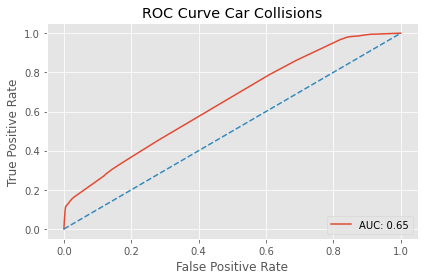

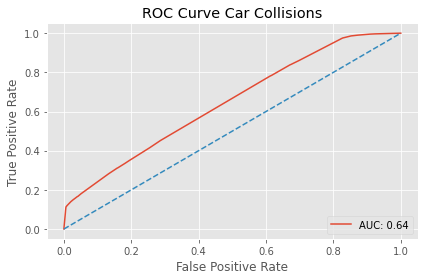

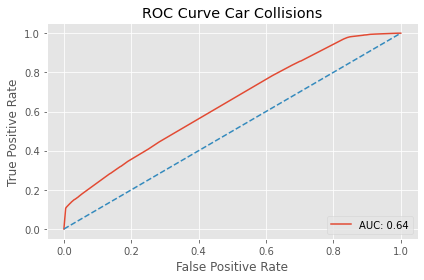

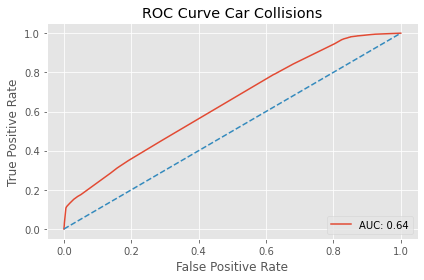

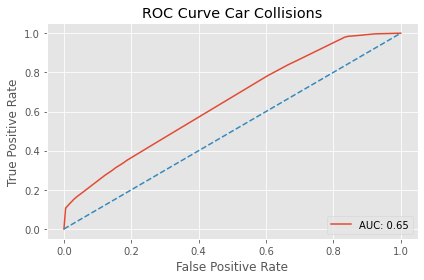

In [92]:
# Get X and y for model
y = data['SEVERITYCODE_Injury']
X = data.drop(columns=['SEVERITYCODE_Injury', 'SEVERITYCODE_Unknown', 
                       'SEVERITYCODE_PropertyDamage', 'INJURIES', 
                       'SERIOUSINJURIES', 'FATALITIES', 'VEHCOUNT',
                      'PEDCYLCOUNT', 'PEDCOUNT'])

X_train, X_test, y_train, y_test = train_test_split(X,y)

# Fit model and get importances
n_splits = 5
columns, feature_importances = light_gbm.kfold_scores(X_train, y_train, n_splits, light_gbm.light_gbm)

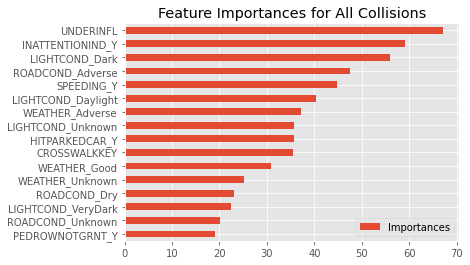

In [93]:
# Plot
importances_all = pd.DataFrame({'Importances':np.array(feature_importances).mean(axis=0)}, 
                           index=columns)
importances_all.sort_values(by='Importances', ascending=True).plot(kind='barh')
plt.title('Feature Importances for All Collisions')
plt.savefig('../reports/figures/lightgbm_importance_all_coll.png', bbox_inches='tight')

#### Ped/cyclists only

In [94]:
### Look at pedestrian/cyclist collisions only
pedcycle = data.loc[(data['PEDCYLCOUNT'] != 0) | (data['PEDCOUNT'] !=0)]
print(pedcycle.shape[0]/data.shape[0])
pedcycle['SEVERITYCODE_Injury'].value_counts()/pedcycle.shape[0]

0.07153738471673254


1    0.900288
0    0.099712
Name: SEVERITYCODE_Injury, dtype: float64

[1]	valid_0's binary_logloss: 0.328693
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.328646
[3]	valid_0's binary_logloss: 0.328567
[4]	valid_0's binary_logloss: 0.328524
[5]	valid_0's binary_logloss: 0.328445
[6]	valid_0's binary_logloss: 0.328407
[7]	valid_0's binary_logloss: 0.328377
[8]	valid_0's binary_logloss: 0.328323
[9]	valid_0's binary_logloss: 0.328273
[10]	valid_0's binary_logloss: 0.328221
[11]	valid_0's binary_logloss: 0.328171
[12]	valid_0's binary_logloss: 0.328133
[13]	valid_0's binary_logloss: 0.328103
[14]	valid_0's binary_logloss: 0.328071
[15]	valid_0's binary_logloss: 0.328047
[16]	valid_0's binary_logloss: 0.328006
[17]	valid_0's binary_logloss: 0.327964
[18]	valid_0's binary_logloss: 0.327927
[19]	valid_0's binary_logloss: 0.32789
[20]	valid_0's binary_logloss: 0.327848
Did not meet early stopping. Best iteration is:
[20]	valid_0's binary_logloss: 0.327848
[1]	valid_0's binary_logloss: 0.319289
Training until validati

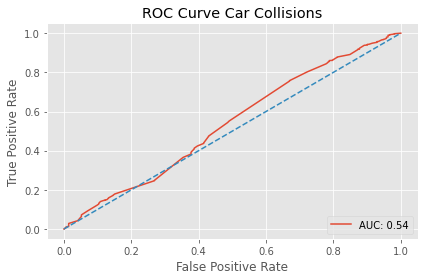

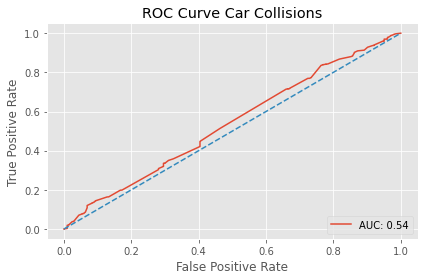

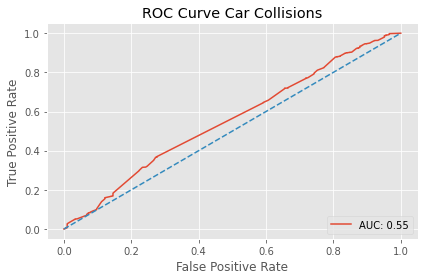

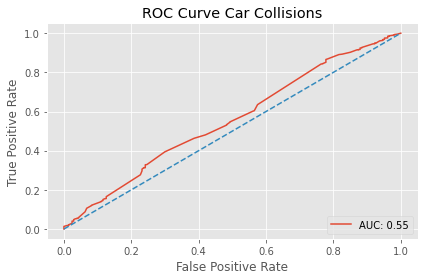

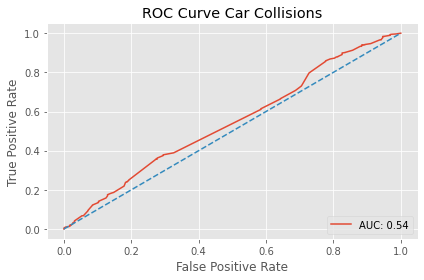

In [95]:
# Get X and y
y = pedcycle['SEVERITYCODE_Injury']
X = pedcycle.drop(columns=['SEVERITYCODE_Injury', 'SEVERITYCODE_Unknown', 
                           'SEVERITYCODE_PropertyDamage', 'INJURIES', 
                           'SERIOUSINJURIES', 'FATALITIES','PEDCYLCOUNT', 
                           'PEDCOUNT', 'VEHCOUNT'])
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Fit model and get importances
n_splits = 5
columns, feature_importances = light_gbm.kfold_scores(X_train, y_train, n_splits, light_gbm.light_gbm)

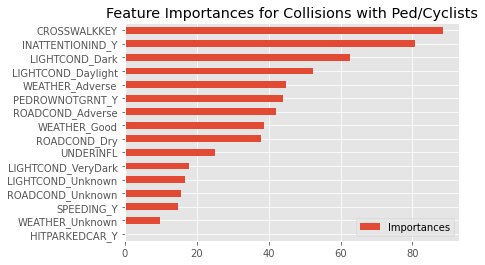

In [96]:
# Plot
importances_ped = pd.DataFrame({'Importances':np.array(feature_importances).mean(axis=0)}, 
                           index=columns)
importances_ped.sort_values(by='Importances', ascending=True).plot(kind='barh')
plt.title('Feature Importances for Collisions with Ped/Cyclists')
plt.savefig('../reports/figures/lightgbm_importance_ped_cyclist.png', bbox_inches='tight')

#### No Pedestrians or Cyclists

In [97]:
no_pedcycle = data.loc[(data['PEDCYLCOUNT'] == 0) & (data['PEDCOUNT'] == 0)]
print(no_pedcycle.shape[0]/data.shape[0])
no_pedcycle['SEVERITYCODE_Injury'].value_counts()/no_pedcycle.shape[0]

0.9284626152832675


0    0.731758
1    0.268242
Name: SEVERITYCODE_Injury, dtype: float64

[1]	valid_0's binary_logloss: 0.582817
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.582467
[3]	valid_0's binary_logloss: 0.582044
[4]	valid_0's binary_logloss: 0.581632
[5]	valid_0's binary_logloss: 0.581224
[6]	valid_0's binary_logloss: 0.580888
[7]	valid_0's binary_logloss: 0.580492
[8]	valid_0's binary_logloss: 0.580093
[9]	valid_0's binary_logloss: 0.579762
[10]	valid_0's binary_logloss: 0.579412
[11]	valid_0's binary_logloss: 0.579046
[12]	valid_0's binary_logloss: 0.578674
[13]	valid_0's binary_logloss: 0.578366
[14]	valid_0's binary_logloss: 0.578015
[15]	valid_0's binary_logloss: 0.57768
[16]	valid_0's binary_logloss: 0.577327
[17]	valid_0's binary_logloss: 0.576978
[18]	valid_0's binary_logloss: 0.576636
[19]	valid_0's binary_logloss: 0.57631
[20]	valid_0's binary_logloss: 0.575981
Did not meet early stopping. Best iteration is:
[20]	valid_0's binary_logloss: 0.575981
[1]	valid_0's binary_logloss: 0.584053
Training until validatio

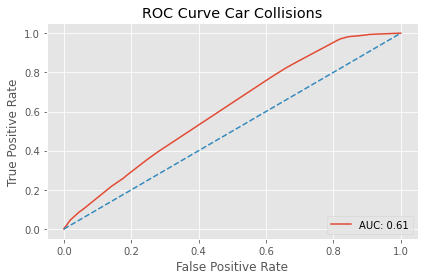

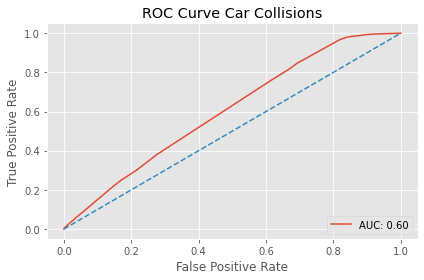

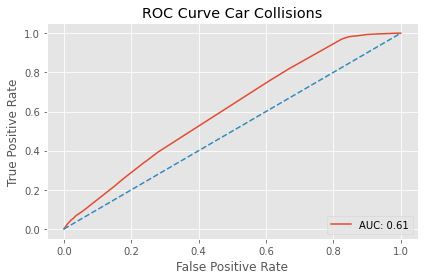

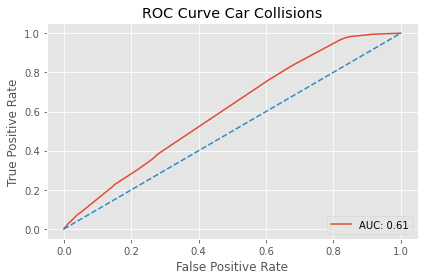

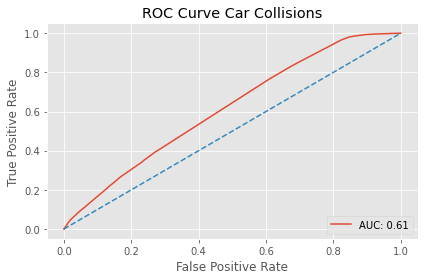

In [214]:
# Get X and y
y = no_pedcycle['SEVERITYCODE_Injury']
X = no_pedcycle.drop(columns=['SEVERITYCODE_Injury', 'SEVERITYCODE_Unknown', 
                           'SEVERITYCODE_PropertyDamage', 'INJURIES', 
                           'SERIOUSINJURIES', 'FATALITIES','PEDCYLCOUNT', 
                           'PEDCOUNT', 'VEHCOUNT'])
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Fit model and get importances
n_splits = 5
columns, feature_importances = light_gbm.kfold_scores(X_train, y_train, n_splits, light_gbm.light_gbm)

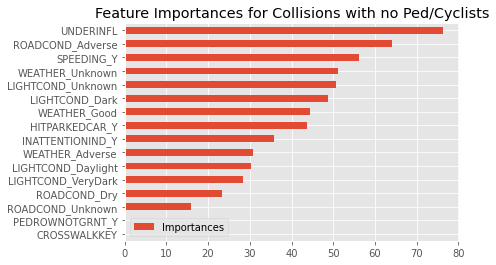

In [100]:
# Plot
importances_car = pd.DataFrame({'Importances':np.array(feature_importances).mean(axis=0)}, 
                           index=columns)
importances_car.sort_values(by='Importances', ascending=True).plot(kind='barh')
plt.title('Feature Importances for Collisions with no Ped/Cyclists')
plt.savefig('../reports/figures/lightgbm_importance_car_only.png', bbox_inches='tight')

## Putting all importances together

In [130]:
importances_all['Car Only'] = importances_car
importances_all['Ped Cyclist'] = importances_ped
importances_all.rename(columns={'Importances': 'All Collisions'}, inplace=True)
importances_all

,All Collisions,Car,Ped,Car Only,Ped Cyclist
UNDERINFL,67.2,76.4,25.2,76.4,25.2
CROSSWALKKEY,35.4,0.0,88.6,0.0,88.6
SPEEDING_Y,44.8,56.2,14.8,56.2,14.8
INATTENTIONIND_Y,59.2,35.8,80.6,35.8,80.6
HITPARKEDCAR_Y,35.8,43.8,0.0,43.8,0.0
...,...,...,...,...,...
ROADCOND_Unknown,20.2,16.0,15.6,16.0,15.6
LIGHTCOND_Dark,56.0,48.8,62.6,48.8,62.6
LIGHTCOND_Daylight,40.4,30.2,52.4,30.2,52.4
LIGHTCOND_Unknown,35.8,50.6,16.8,50.6,16.8


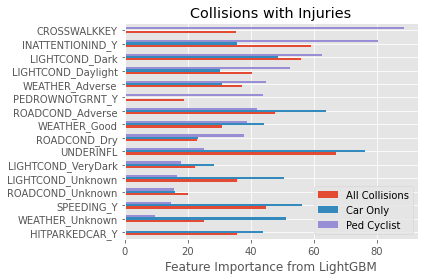

In [135]:
importances_all.sort_values(by='Ped Cyclist').plot(kind='barh')
plt.title("Collisions with Injuries")
plt.xlabel('Feature Importance from LightGBM')
plt.tight_layout()
plt.savefig('../reports/figures/combined_importances_lgb.png', bbox_inches='tight')

### Putting all feature importances together

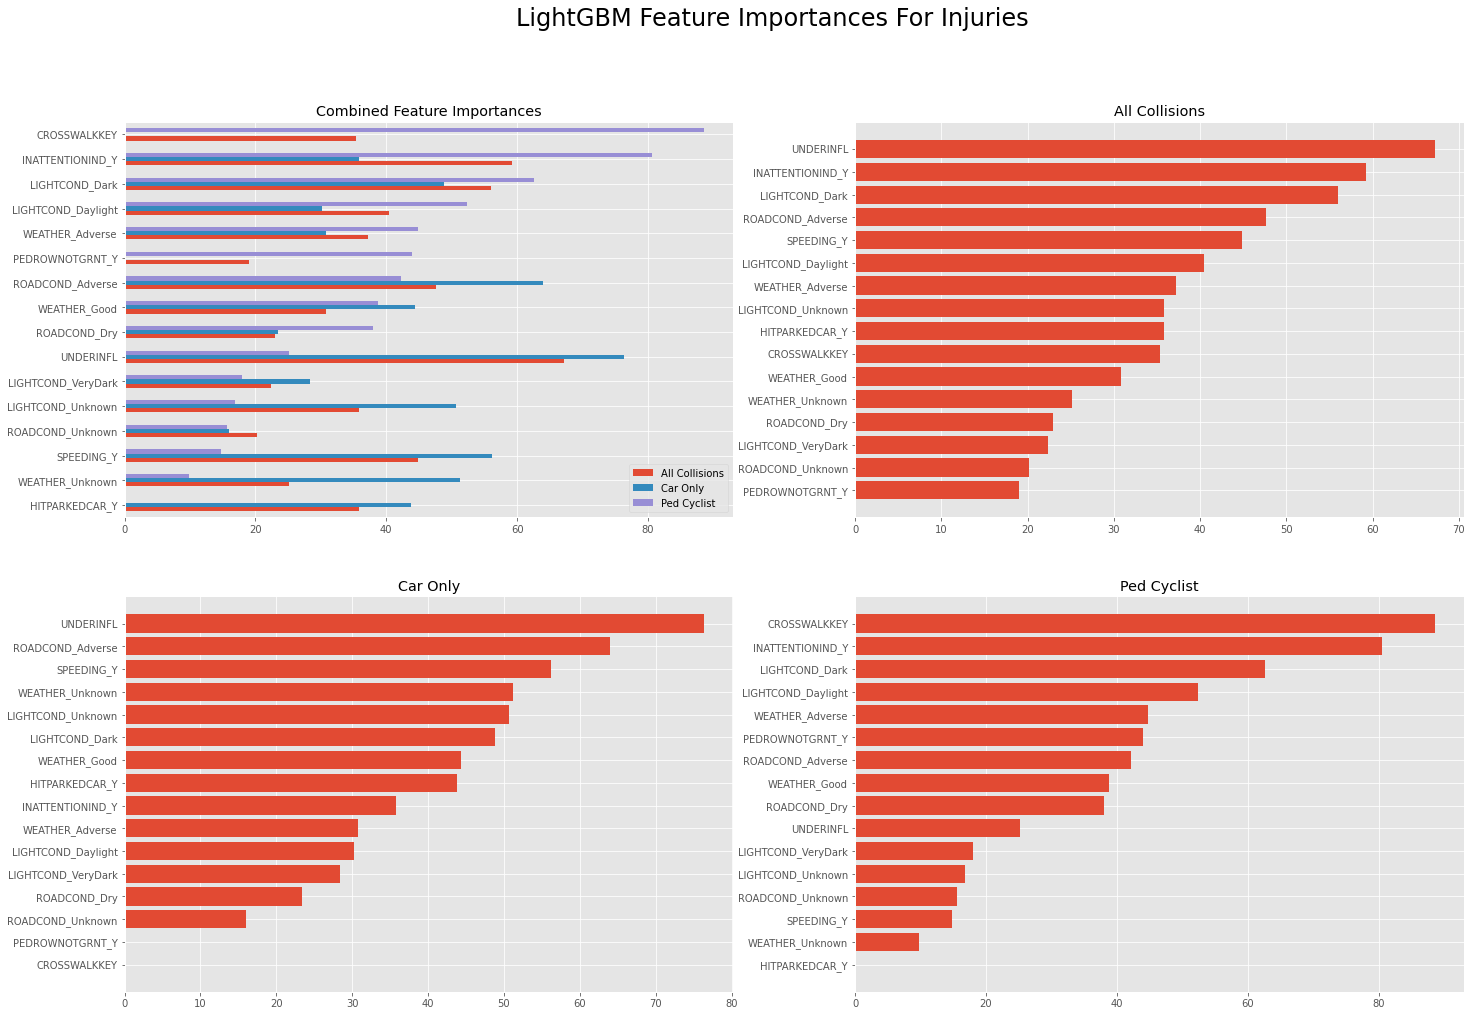

In [168]:
fig, axes = plt.subplots(2,2,figsize=(24,16))

# Plot combined bar chart
ax = axes[0,0]
importances_all.sort_values(by='Ped Cyclist').plot(kind='barh', ax=ax)
ax.set_title('Combined Feature Importances')

# Plot the rest
titles = importances_all.columns
for i, ax in enumerate(axes.flatten()):
    if i == 0:
        continue
    series = importances_all[titles[i-1]].sort_values()
    ax.barh(series.index, series.values)
    ax.set_title(titles[i-1])

plt.suptitle('LightGBM Feature Importances For Injuries', fontsize=24)
plt.savefig('../reports/figures/lightgbm_combined.png', bbox_inches='tight', dpi=250)

<BarContainer object of 16 artists>

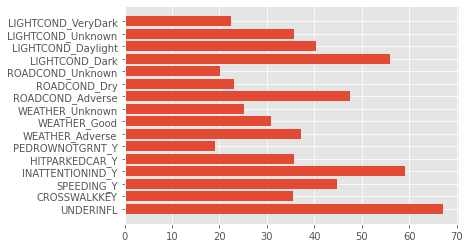

In [141]:
fig, ax = plt.subplots()
ax.barh(importances_all['All Collisions'].index, importances_all['All Collisions'].values)

## Logistic Model

In [257]:
model = LogisticRegression()
model.fit(X_train.values, y_train.values)
importances = model.coef_
names = X_train.columns

In [261]:
importances = light_gbm.kfold_scores(X_train, y_train, 5, light_gbm.logistic_regression)

/home/maureen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [266]:
np.array(importances[1]).mean(axis=0)

array([ 0.42708574,  0.93152881,  0.50609634,  0.2278164 , -1.56678694,
        0.08210495,  0.01938024, -0.02635779, -0.48501211,  0.25834641,
        0.2488848 , -0.99922087,  0.1813153 ,  0.33632538, -0.8457422 ,
       -0.16388814])

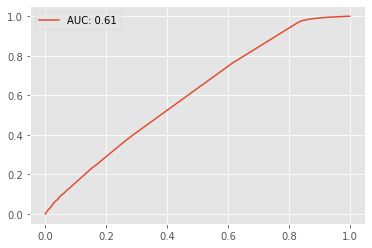

In [235]:
y_pred = model.predict_proba(X_test)
auc_score = roc_auc_score(y_test.values, y_pred[:,1])
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:,1])

plt.plot(fpr, tpr, label='AUC: {:2.2f}'.format(auc_score))
plt.legend()

## Code Testing
This has been ported into source .py file

In [206]:
# Create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify configuration
params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'num_leaves': 31,
        'learning_rate': 0.01,
        'feature_fraction': 0.8,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'verbose': 0
}

gbm = lgb.train(params, 
                lgb_train, 
                num_boost_round=20, 
                valid_sets=lgb_eval, 
                early_stopping_rounds=5)

gbm.save_model('lgbm_model.txt')

[1]	valid_0's binary_logloss: 0.580851
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.580513
[3]	valid_0's binary_logloss: 0.580109
[4]	valid_0's binary_logloss: 0.57971
[5]	valid_0's binary_logloss: 0.579317
[6]	valid_0's binary_logloss: 0.578989
[7]	valid_0's binary_logloss: 0.578606
[8]	valid_0's binary_logloss: 0.578222
[9]	valid_0's binary_logloss: 0.577898
[10]	valid_0's binary_logloss: 0.57756
[11]	valid_0's binary_logloss: 0.577203
[12]	valid_0's binary_logloss: 0.576842
[13]	valid_0's binary_logloss: 0.576538
[14]	valid_0's binary_logloss: 0.576196
[15]	valid_0's binary_logloss: 0.575867
[16]	valid_0's binary_logloss: 0.57553
[17]	valid_0's binary_logloss: 0.575194
[18]	valid_0's binary_logloss: 0.574863
[19]	valid_0's binary_logloss: 0.574555
[20]	valid_0's binary_logloss: 0.574246
Did not meet early stopping. Best iteration is:
[20]	valid_0's binary_logloss: 0.574246


(['PEDCOUNT',
  'PEDCYLCOUNT',
  'VEHCOUNT',
  'UNDERINFL',
  'CROSSWALKKEY',
  'SPEEDING_Y',
  'INATTENTIONIND_Y',
  'HITPARKEDCAR_Y',
  'PEDROWNOTGRNT_Y',
  'WEATHER_Adverse',
  'WEATHER_Good',
  'WEATHER_Unknown',
  'ROADCOND_Adverse',
  'ROADCOND_Dry',
  'ROADCOND_Unknown',
  'LIGHTCOND_Dark',
  'LIGHTCOND_Daylight',
  'LIGHTCOND_Unknown',
  'LIGHTCOND_VeryDark'],
 array([13, 17, 61, 80, 13, 69, 41, 38, 18, 14, 17, 33, 33,  9, 26, 31, 45,
        31, 11], dtype=int32))

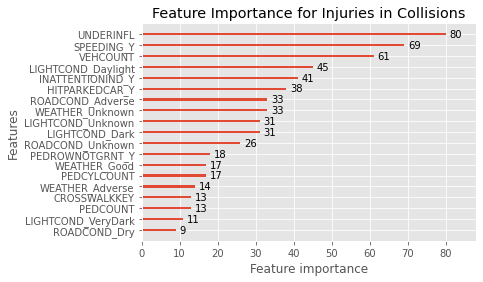

In [76]:
# Get feature importances for injury occuring in collision
test = lgb.plot_importance(gbm, title="Feature Importance for Injuries in Collisions")
gbm.feature_name(), gbm.feature_importance()

#plt.savefig('../reports/figures/lightgbm_importance_allcollisions.png')

In [63]:
# Do prediction and get AUC score
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
auc_score = roc_auc_score(y_test, y_pred)

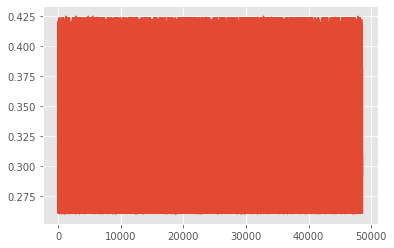

In [65]:
plt.plot(y_pred)

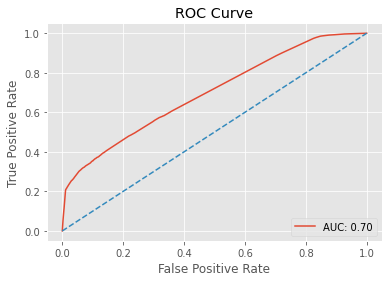

In [93]:
# Plot AUC 
# THIS LOOKS OFF -> INVESTIGATE
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

fig, ax = plt.subplots()
ax.plot(fpr, tpr, label='AUC: {:2.2f}'.format(auc_score))
ax.legend(loc='lower right')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.plot(np.linspace(0,1,100), np.linspace(0,1,100), '--')
plt.savefig('reports/figures/lightgbm_auc.png')

In [38]:
thresholds

array([1.42475118, 0.42475118, 0.4238788 , 0.42371797, 0.42356321,
       0.42279256, 0.42189478, 0.42141843, 0.42117967, 0.42080065,
       0.42032464, 0.4201722 , 0.42012746, 0.41962668, 0.41957854,
       0.41920546, 0.41918528, 0.41913716, 0.41894934, 0.41888389,
       0.41870147, 0.41868087, 0.41836269, 0.41827698, 0.41779193,
       0.41767631, 0.41737527, 0.4173272 , 0.41712009, 0.41704927,
       0.41683218, 0.41619995, 0.41567643, 0.41545896, 0.41542722,
       0.41511942, 0.41505941, 0.41412915, 0.41399419, 0.41394291,
       0.41363342, 0.41353263, 0.41345946, 0.41327106, 0.4128616 ,
       0.4125145 , 0.41250865, 0.39890837, 0.39885727, 0.39771239,
       0.3977122 , 0.39760959, 0.39698328, 0.39678695, 0.39662135,
       0.39647337, 0.39632055, 0.39601814, 0.39584475, 0.39577047,
       0.39556495, 0.39439288, 0.39401707, 0.39308931, 0.39297633,
       0.39279717, 0.39209276, 0.39151543, 0.39144206, 0.39129476,
       0.39114264, 0.39102546, 0.39084163, 0.39072583, 0.39057

In [204]:
def test(a, b, **kwargs):
    print(a+b)
    for arg in kwargs.values():
        print(arg)
    print(list(kwargs.values()))
    return None

In [205]:
test(1,3, num_iteration='cat')

4
cat
['cat']
